In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **CHECKING DATA**

In [51]:
print("rowws=",train.shape[0],"cols =",train.shape[1])
print("rowws=",test.shape[0],"cols =",test.shape[1])


rowws= 1460 cols = 81
rowws= 1459 cols = 80


In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

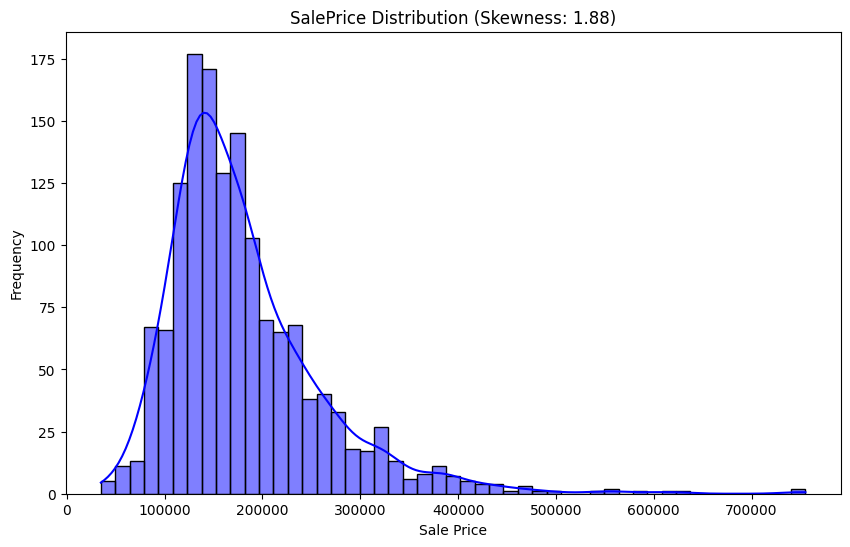

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title(f"SalePrice Distribution (Skewness: {train['SalePrice'].skew():.2f})")
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

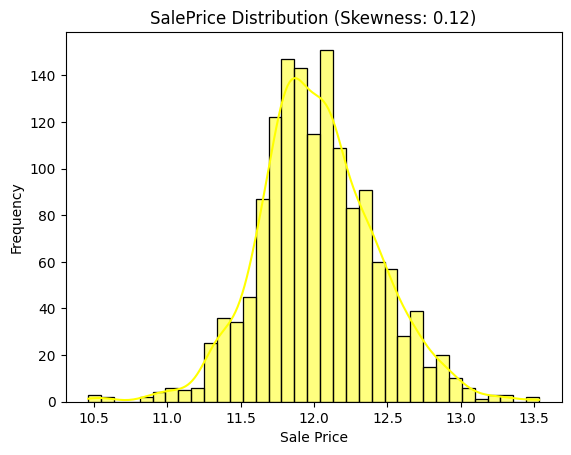

In [55]:
train['SalePrice']= np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'], kde=True, color='yellow')
plt.title(f"SalePrice Distribution (Skewness: {train['SalePrice'].skew():.2f})")
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# **Overfitting**

In [56]:
# train['SalePrice']= np.sqrt(train['SalePrice'])
# sns.histplot(train['SalePrice'], kde=True, color='yellow')
# plt.title(f"SalePrice Distribution (Skewness: {train['SalePrice'].skew():.2f})")
# plt.xlabel('Sale Price')
# plt.ylabel('Frequency')
# plt.show()

In [57]:
# train['SalePrice']= np.sqrt(train['SalePrice'])
# sns.histplot(train['SalePrice'], kde=True, color='yellow')
# plt.title(f"SalePrice Distribution (Skewness: {train['SalePrice'].skew():.2f})")
# plt.xlabel('Sale Price')
# plt.ylabel('Frequency')
# plt.show()

In [58]:
# train['SalePrice']= np.sqrt(train['SalePrice'])
# sns.histplot(train['SalePrice'], kde=True, color='yellow')
# plt.title(f"SalePrice Distribution (Skewness: {train['SalePrice'].skew():.2f})")
# plt.xlabel('Sale Price')
# plt.ylabel('Frequency')
# plt.show()

# **CLEANING DATA**

In [59]:
#making mssub class which are making years into strings to make sure no error occurs
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

In [60]:
numerical= train.select_dtypes(include=[np.number]).columns
category = train.select_dtypes(include=['object']).columns

if 'SalePrice' in numerical:
    numerical = numerical.drop('SalePrice')

filling missing values

In [61]:
for col in numerical:
    median = train[col].median()
    # You must assign it back with "train[col] ="
    train[col] = train[col].fillna(median)
    test[col] = test[col].fillna(median)
for col in category:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')


In [62]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [63]:
test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


# **FEATURE ENGINEERING**

SQUARE FT

In [64]:
train['YrSold'].max()

2010

In [65]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

#Bathroom

train['Totalbath'] = train['FullBath'] + (0.5 *train['HalfBath'] )+ train['BsmtFullBath'] +(0.5 * train['BsmtHalfBath'])
test['Totalbath'] = test['FullBath'] + (0.5 *test['HalfBath'] )+ test['BsmtFullBath'] + (0.5*test['BsmtHalfBath'])

#CREATE HOUSE AGEW
train['HouseAge'] = 2010 - train['YearBuilt']
test['HouseAge'] = 2010 - test['YearBuilt']

#CREATE REMODEL AGE
train['RemodelAge'] = 2010 - train['YearRemodAdd']
test['RemodelAge'] = 2010 - test['YearRemodAdd']

train[['TotalSF','Totalbath','HouseAge','RemodelAge']].head()

,TotalSF,Totalbath,HouseAge,RemodelAge
0,2566,3.5,7,7
1,2524,2.5,34,34
2,2706,3.5,9,8
3,2473,2.0,95,40
4,3343,3.5,10,10


In [66]:
ordinal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PoolQC']

for col in ordinal_cols:
    train[col] = train[col].map(ordinal_map)
    test[col] = test[col].map(ordinal_map)

    # Assign it back!
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

train = pd.get_dummies(train, drop_first= True)
test = pd.get_dummies(test, drop_first=True)

train, test= train.align(test, join='left', axis=1)

test = test.fillna(0)
print(train.shape)
print(test.shape)



(1460, 249)
(1459, 249)


# MODELING

In [67]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


y=train['SalePrice']
X=train.drop(['Id', 'SalePrice'], axis =1)

X_test=test.drop(['Id'], axis =1)


ridge_model = Ridge(alpha=10.0)
lasso_model = Lasso(alpha=0.001)

def get_rmse(model):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    return rmse

print(f"Ridge Score (RMSE): {get_rmse(ridge_model):.4f}")
print(f"Lasso Score (RMSE): {get_rmse(lasso_model):.4f}")

Ridge Score (RMSE): 0.1426
Lasso Score (RMSE): 0.1427



# FINDING PERFECT ALPHA

---

# **RIDGE**

In [68]:
lasso_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]

print("\n--- LASSO TOURNAMENT ---")
for a in lasso_alphas:
    # Build a new model with the current alpha
    model = Lasso(alpha=a)

    # Calculate the score
    score = get_rmse(model)
    print(f"Lasso (Alpha = {a}): {score:.4f}")


--- LASSO TOURNAMENT ---
Lasso (Alpha = 0.0001): 0.1563
Lasso (Alpha = 0.0005): 0.1426
Lasso (Alpha = 0.001): 0.1427
Lasso (Alpha = 0.005): 0.1559
Lasso (Alpha = 0.01): 0.1608


In [69]:


print ("--RIDGE--")
ridge_alphas = [0.1, 1.0, 5.0, 10.0, 15.0, 20.0, 30.0]

print("--- RIDGE TOURNAMENT ---")
for a in ridge_alphas:
    model = Ridge(alpha=a)

    score = get_rmse(model)
    print(f"Ridge (Alpha = {a}): {score:.4f}")

--RIDGE--
--- RIDGE TOURNAMENT ---
Ridge (Alpha = 0.1): 0.1616
Ridge (Alpha = 1.0): 0.1480
Ridge (Alpha = 5.0): 0.1435
Ridge (Alpha = 10.0): 0.1426
Ridge (Alpha = 15.0): 0.1423
Ridge (Alpha = 20.0): 0.1424
Ridge (Alpha = 30.0): 0.1427


In [70]:
#ridge
X_test = test[X.columns]
final_ridge = Ridge(alpha=15.0)
final_ridge.fit(X, y)

ridge_prediction = final_ridge.predict(X_test)
real_ridge_prediction = np.expm1(ridge_prediction)#removing log

#lasso
final_lasso = Lasso(alpha=0.0005)
final_lasso.fit(X, y)
lasso_prediction = final_lasso.predict(X_test)
real_lasso_prediction = np.expm1(lasso_prediction)#removing log

finalized=(real_lasso_prediction+real_ridge_prediction)/2 #blending ridge and lasso




In [75]:
submit = pd.DataFrame({
'Id': test['Id'],'SalePrice': finalized})

submit.head()


,Id,SalePrice
0,1461,109830.802390
1,1462,144487.605614
2,1463,167910.374494
3,1464,191430.007066
4,1465,195993.569270


saving model


In [76]:
sub = submit.to_csv('submission.csv', index=False)